## Time Series Analysis

## Goal: Find outliers, trends and periodicity in the MTA turnstyle data

## continuation of HW 11



### Task 4:

Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)

In [1]:
from __future__ import print_function, division
import pylab as pl
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
% pylab inline

from IPython.display import Image
from IPython.display import clear_output
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
import statsmodels.tsa.stattools as st
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma

In [3]:
import operator

In [4]:
import scipy.cluster as scp

In [5]:
mta = np.load('MTA_Fare.npy')

In [13]:
stations  = np.nansum(mta, axis = 1)

In [29]:
stations[0].shape

(194,)

## 4. Fourier transform

(-0.014175257731958763, 0.3333333333333333)

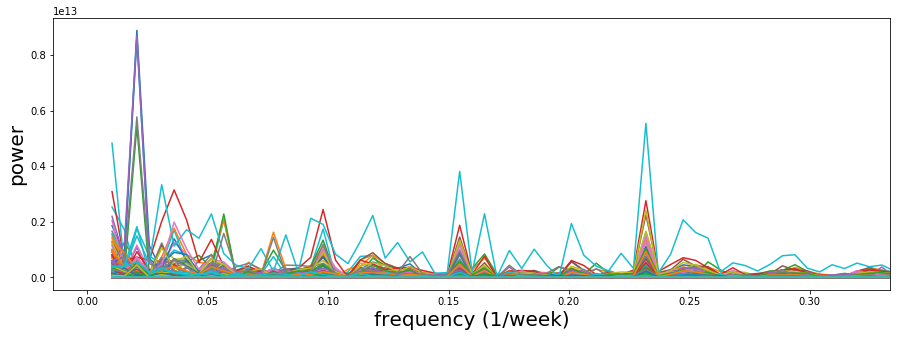

In [64]:
timeset = {}
plt.figure(figsize=(15,5))
for i in range(600):
    Nd = len(stations[i])
    f = np.abs(np.fft.rfft(stations[i]))**2
#     plt.plot(np.fft.rfftfreq(Nd, 1.0)[2:], (f[2:]), 'o', ms=20)
    plt.plot(np.fft.rfftfreq(Nd, 1.0)[2:], (f[2:]), '-')
#     plt.xticks(["%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    timeset[i] = f[2:].max()
    
pl.ylabel("power", fontsize=20)
pl.xlabel("frequency (1/week)", fontsize=20);
pl.xlim(pl.xlim()[0], 1.0/3)

## Figure 1. 
the real component of fourier transformed time series. The FFT omitting its first 2 value

## time set is now a set, key is the index of the station, value is the power

In [65]:
for _ in range(4):
    index, value = max(timeset.items(), key = operator.itemgetter(1))
    print(index)
    timeset.pop(index)
    Nd = len(stations[index])
    f = np.abs(np.fft.rfft(stations[index]))**2
    period = np.where(f[2:] == f[2:].max())[0][0] + 2
    print ("most important  periods: ")
    print ("%.2f weeks"%(1.0 / np.fft.rfftfreq(Nd, 1.0)[period]))

0
most important  periods: 
48.50 weeks
194
most important  periods: 
48.50 weeks
150
most important  periods: 
48.50 weeks
327
most important  periods: 
48.50 weeks


48.50 weeks after 5/21/2010, around April/27/2011.

The 2011 Super Outbreak was the largest, costliest and one of the deadliest tornado outbreaks.